In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
%matplotlib inline

# Epidemie e il tasso di riproduzione

In epidemiologia il *[tasso netto di riproduzione](https://it.wikipedia.org/wiki/Tasso_netto_di_riproduzione)* di un'infezione, indicato con $R_{0}$, indica il numero di nuovi casi generati in media da un singolo caso durante il proprio periodo infettivo in una popolazione che altrimenti non sarebbe infetta.

Questa misura è utile per determinare la possibilità di propagazione di un'infezione in una popolazione.

Se $R_{0}$ < 1 l'infezione sul lungo termine si estinguerà, mentre se $R_{0}$ > 1 l'infezione potrà diffondersi nella popolazione.

### Il covid-19 e il suo tasso netto di riproduzione

Nel caso del covid-19, possiamo assumere che quasi tutta la popolazione sia interamente suscettibile, visto che si tratta di un virus nuovo.
    
Ad oggi, si pensa che il tasso $R_{0}$ per il covid-19 sia intorno a 2.3 (*): questo significa che ogni persona infetta trasmetterà il virus ad altre 2.3 persone, in media, nell'arco del proprio tempo infettivo.

(*) valori riportati tra 1.4 e 3.9; fare riferimento alla [pagina Wikipedia](https://en.wikipedia.org/wiki/Basic_reproduction_number) (in Inglese) per la letteratura scientifica.

## Modello 1: modello epidemiologico SIR

Il [modello epidemiologico SIR](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model) suddivide la popolazione in 3 categorie:

- S(t): soggetti suscettibili ma non ancora infetti (individui sani passibili di contagio)
- I(t): soggetti infetti (in grado di trasmettere il contagio)
- R(t): soggetti rimossi (guariti o morti)

Il modell SIR si serve di due parametri per descrivere l'evoluzione di un'epidemia, β (beta) e γ (gamma).
β descrive il tasso di infezione: un soggetto infetto viene a contatto con altri βN soggetti in una unità di tempo (ad esempio un giorno), e di questi βN soggetti, S/N saranno suscettibili al contagio (si possono cioè ammalare).

γ invece è il tasso medio di guarigione: 1/γ è l'arco di tempo medio durante il quale un soggetto infetto può contagiare altri soggetti.
Il modello è descritto dalle seguenti equazioni differenziali:

- dS/dt = -βSI
- dI/dt = βSI- γI
- dR/dt = γI

Da notare che in questo modello non si assumono altri eventi demografici (nascite, morti), la popolazione è cioè definita chiusa.

Da notare, ancora, l'assenza di misure profilattiche quali quarantine, riduzione del contatto tra soggetti suscettibili, o una campagna di vaccinazioni.

In [2]:
import sys
sys.path.append('../')

In [3]:
import modelli as md
import numpy as np

In [22]:
# popolazione totale
N = 4000
# numero iniziale di soggetti infetti e rimossi, I0 ed R0
I0, R0 = 1, 0
# il resto della popolazione, S0, è inizialmente suscettibile all'infezione
S0 = N - I0 - R0
# beta: tasso di infezione; gamma: tasso medio di guarigione
beta, gamma = 0.23, 1./10
R0 = beta / gamma
print(f'R0 = {R0}')
# arco di tempo in giorni
t = np.linspace(0, 150, 150)

R0 = 2.3


In [6]:
y0 = S0, I0, R0
S, I, R = md.resolve(y0, t, N, beta, gamma)

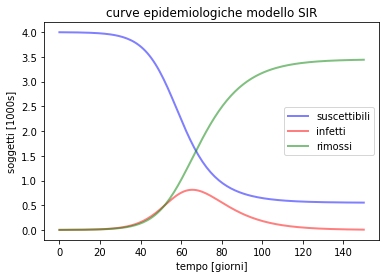

In [17]:
md.plot(S, I, R, t)

**Come si legge questo grafico?**

 - interpretazione qui - 

In questo modello, dopo essersi ammmalato, un soggetto può guarire o morire; inoltre, se guarito, il soggetto non può essere nuovamente contagiato (diventa, cioè immune).

Col passare del tempo è naturale che il numero di soggetti suscettibili diminuisca; il tasso di crescita di un'epidemia in corso si chiama tasso di riproduzione effettivo, $R_{e}$.

Quando $R_{e}$ < 1, l'epidemia smette di diffondersi.

Tutto quello che abbiamo detto fino ad ora presuppone una _popolazione chiusa_; nel mondo reale, ovviamente, non funziona così: la gente si muove e un soggetto infetto potrebbe lasciare il nostro gruppo di 4000 persone e trasmettere il virus ad un'altra popolazione in un'altra città, un altro Paese...). 

Un virus che tutti conosciamo è quello che causa il **morbillo**, una malattia altamente contagiosa, per la quale $R_{0}$ è stato estimato in un intervallo di valori tra 12 e 18: dato che ciascuna persona infetta può trasmettere il virus fino a 18 persone (in media), è facile immaginare come il virus infetti tutta la popolazione in un arco di tempo parecchio ristretto.

Vediamo come sono le curve SIR per un'epidemia come quella del morbillo.

In [18]:
# popolazione totale
N = 4000
# numero iniziale di soggetti infetti e rimossi (guariti), I0 ed R0
I0, R0 = 1, 0
# il resto della popolazione, S0, è suscettibile all'infezione inizialmente
S0 = N - I0 - R0
# beta: tasso di infezione; gamma: tasso medio di guarigione
beta, gamma = 1.8, 1./10
R0 = beta / gamma
print(f'R0 = {R0}')
# una grid di punti (in giorni)
t = np.linspace(0, 60, 60)

R0 = 18.0


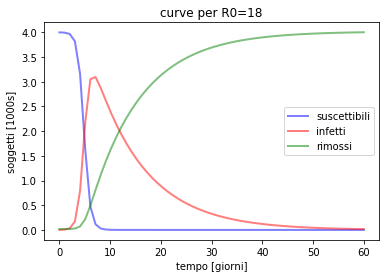

In [20]:
# condizioni iniziali 
y0 = S0, I0, R0
S, I, R = md.resolve(y0, t, N, beta, gamma)
md.plot(S, I, R, t, title='curve per R0=18')

**Attenzione, però!** Questa è una simulazione in cui nessun soggetto è stato sottoposto al vaccino.

Un'epidemia di questo tipo può infatti essere contenuta con una **campagna di vaccinazione**: l'Organizzazione Mondiale della Sanità ci dice che nel 2018 circa l'86% dei bambini al mondo al di sotto dei 2 anni è stato vaccinato contro il virus del morbillo (dati [qui](https://www.who.int/immunization/newsroom/new-measles-data-august-2019/en/) in Inglese).

Queste simulazioni (molto, molto semplificate!) ci mostrano come fa un'epidemia a finire (anche senza intervento umano): col passare del tempo, il virus non ha più soggetti suscettibili da infettare. Ovviamente, non dobbiamo di certo aspettare che un virus faccia il suo corso naturale per ridurre l'epidemia e i suoi effetti: misure come **igiene personale**, **quarantene**, **distanze interpersonali**, possono essere adoperate per limitare il rischio di contagio tra soggetti suscettibili.

## Modello 2: modello epidemiologico SEIR

Il modello epidemiologico SEIR è un'estensione del modello SIR che abbiamo visto finora.
Questo modello prevede la presenza di tre categorie di soggetti: 

- S(t): soggetti suscettibili ma non ancora infetti (individui sani passibili di contagio)
- E(t): soggetti esposti al contagio
- I(t): soggetti infetti (in grado di trasmettere il contagio)
- R(t): soggetti rimossi (guariti o morti)

Questo modello aggiunge un periodo di latenza allo sviluppo del contagio: gli individui che sono esposti (E) all'epidemia sono stati a contatto con persone infette, ma non sono state necessariamente contagiate. 

Il modell SEIR si serve di tre parametri per descrivere l'evoluzione di un'epidemia, β (beta), γ (gamma) (abbiamo visto questi due nel modello SIR) e α (alpha) è l'inverso del tempo medio di incubazione, cioè del periodo che intercorre tra quando l'individuo è stato contagiato e quando diviene contagiato a sua volta.

Il modello è descritto dalle seguenti equazioni differenziali:

- dS/dt = -βSI
- dE/dt = βSI - αE
- dI/dt = αE - γI
- dR/dt = γI

So if we assume we have N=10k people in our population, and we begin with one exposed person and the remaining 9,999 susceptible, we have:

In [72]:
# periodo di incubazione: 5 days
alpha = 0.2
# popolazione totale
N = 10000

S0 = 1 - (1/N)
E0 = 1/N
I0 = 0
R0 = 0

# beta: tasso di infezione; gamma: tasso medio di guarigione
beta, gamma = 0.23, 1./15
R0 = beta / gamma
print(f'R0 = {R0}')
# arco di tempo in giorni
t = np.linspace(0, 150, 150)

R0 = 3.45


In [73]:
y0 = S0, E0, I0, R0

In [74]:
S, E, I, R = md.resolve_SEIR(y0, t, N, beta, gamma, alpha)

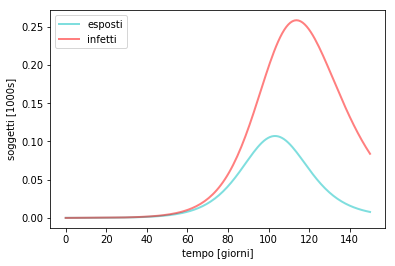

In [75]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(t, E, 'c', alpha=0.5, lw=2, label='esposti')

plt.plot(t, I, 'r', alpha=0.5, lw=2, label='infetti')
plt.xlabel('tempo [giorni]')
plt.ylabel('soggetti [1000s]')
plt.legend()


## effetti della distanza interpersonale

In [161]:
def deriv_SIR(y, t, N, beta, gamma, rho):
    S, I, R = y
    dSdt = -rho * beta * S * I / N
    dIdt = rho * beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [162]:
def resolve(y0, t, N, beta, gamma, rho):
    # risoluzione delle eq. diff.
    ret = odeint(deriv_SIR, y0, t, args=(N, beta, gamma, rho))
    S, I, R = ret.T
    return S, I, R

In [173]:
# popolazione totale
N = 4000
# numero iniziale di soggetti infetti e rimossi (guariti), I0 ed R0
I0, R0 = 1, 0
# il resto della popolazione, S0, è suscettibile all'infezione inizialmente
S0 = N - I0 - R0
# beta: tasso di infezione; gamma: tasso medio di guarigione
beta, gamma = 0.23, 1./10
# una grid di punti (in giorni)
t = np.linspace(0, 250, 250)

In [174]:
rho_values = [1.0, 0.8, 0.6]

In [175]:
# condizioni iniziali 
y0 = S0, I0, R0

In [176]:
results = {}

# risoluzione delle eq. diff.
for rho in rho_values:
    S, I, R = resolve(y0, t, N, beta, gamma, rho)
    results[rho] = (S, I, R)

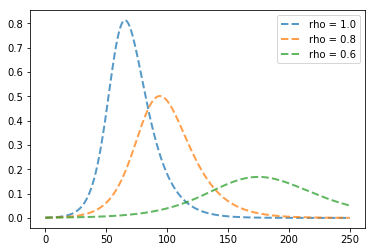

In [182]:
fig = plt.figure(facecolor='w')
for index, (rho, (S, I, _)) in enumerate(results.items()):
    plt.plot(t, I/1000, alpha=0.75, lw=2, ls='--', label=f'rho = {rho}', color=f'C{index}')
plt.legend()
plt.show()